# Business Understanding

Airbnb is an American vacation rental online marketplace company based in San Francisco, California. Airbnb maintains and hosts a marketplace, accessible to consumers on its website or app. Users can arrange lodging, primarily homestays, and tourism experiences or list their spare rooms, properties, or part of it for rental. On the other hand, users who are traveling are looking for stays search properties and rooms by neighborhood or location. Airbnb recommends the best price in the neighborhood and users book the best deal. Thanks to Kaggle and Udacity that I got a chance to analyze Airbnb listings of Boston city. Boston Airbnb listings dataset has various features such as neighborhood, property_type, bedrooms, bathrooms, beds, price, reviews, ratings, etc. It would be interesting to see what features are affecting the price in Boston city and draw interesting conclusions. I would be more interested in training and evaluating the model and to see how the model has performed while predicting the prices in Boston city at Airbnb. My primary goal would be answering following questions:

1. What Features are affecting the price most ? name the features that affects the price most.
2. How do features affect the price of listings ? Does experience and comfort cost more to the user ?
3. Can we predict the price of a listing in Boston AirBnB ?

# Data Understanding

I am selecting Boston AirBnB listings as my dataset for the study. It is available on Kaggle https://www.kaggle.com/airbnb/boston. Listings dataset has various features/columns such as neighborhood, property_type, bedrooms, bathrooms, beds, price, reviews, ratings, etc.

To understand the data we have to explore it. Thanks to python, pandas, numpy, matplot, seaborn, and sklearn aka scikit learn which made my life easy to perform data science activities. Pandas is been excellent when it comes to load, clean and transform the data sets. Seaborn is a handy package to visualize data concluded from pandas transformation functions. It offers high-level functions to plot bar charts, histograms, distributions, box plots, etc. I will be using all these packages to explore the data. I would be performing the following data science activities to explore the data:
1. Import packages and read Boston Airbnb datasets
2. Data cleaning and transformation
3. Numerical features analysis
4. Categorical features analysis

**Import packages and read listings dataset**

Importing NumPy and pandas for linear algebra and data processing respectively.
Importing matplotlib pyplot and seaborn for plotting dataset.
Importing sklearn packages for training and evaluating a model.

After importing all the necessary packages let's load the Boston Airbnb listings dataset into the memory. Pandas read_csv function made reading CSV files is way easy. It takes the file path including other optional parameters and returns a data frame object.

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

_listings_raw = pd.read_csv('./datasets/boston/listings.csv', index_col = "id")

_listings = _listings_raw.copy()

_listings.shape

(3585, 94)

# Exploring dataset

Exploring datasets is one of my favorite data science activities. It gives us lots of interesting and shocking facts about the features of the dataset. Moreover, it helps to identify the best features affecting the target variable. There are some cool functions such as a shape that returns the number of rows and columns of the dataset. Info function outputs a full list of columns, data type, and count of non-null values along with rows and columns. These functions help me understand the nature of features.

As part of this activity, I would like to initially clean the dataset followed by simple transformations and then perform Numerical and Categorical Features analysis. 

In [7]:
print(_listings.shape)

(3585, 94)


**Observation:**

We can see Boston Airbnb listings dataset has 3585 rows and 94 columns. There are too many columns. We need to know more about the type of columns and null value counts so that we can clean data next.

In [8]:
print(_listings.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 12147973 to 14504422
Data columns (total 94 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_url                       3585 non-null   object 
 1   scrape_id                         3585 non-null   int64  
 2   last_scraped                      3585 non-null   object 
 3   name                              3585 non-null   object 
 4   summary                           3442 non-null   object 
 5   space                             2528 non-null   object 
 6   description                       3585 non-null   object 
 7   experiences_offered               3585 non-null   object 
 8   neighborhood_overview             2170 non-null   object 
 9   notes                             1610 non-null   object 
 10  transit                           2295 non-null   object 
 11  access                            2096 non-null   object 


**Observations:**
1. Some columns have very few non-null values. I am going to remove these columns from the data sets.
2. There are columns such as host_url, medium_url, pricture_url, etc that are not useful thus should be removed.
3. There are columns such as price, cleaning_fee, security_deposit, host_response_rate, etc that are of type object. These columns can be converted to number type.

# Initial Data cleaning and transformations

Based on the above observations I am going to write a function that uses pandas high-level functions to drop columns that are not useful, drop columns having fewer values, fill na values and converting some object type columns to numeric columns. This activity will clean the data and will make more sense.

In [10]:
def clean_listing_dataset():
    # step 1: remove columns from the data set that are not useful for price prediction
    # step 2: remove columns that has very high percentage of na values
    # step 3: transform price and other numeric columns from string to int,float type
    _cols_to_drop = ['listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'picture_url',
                     'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url',
                     'city', 'state', 'country', 'country_code', 'market', 'requires_license',
                     'experiences_offered', 'first_review', 'last_review', 'calendar_last_scraped',
                     'calendar_updated', 'scrape_id', 'last_scraped', 'space', 'host_neighbourhood',
                     'neighborhood_overview', 'host_listings_count', 'zipcode', 'is_location_exact', 'host_location',
                     'host_total_listings_count', 'neighbourhood', 'smart_location', 'host_id']
    
    # droping columns that are not useful
    _listings.drop(_cols_to_drop, axis=1, inplace=True)
    
    # droping columns having no values or less than thres
    _thresh = len(_listings) * .35
    _listings.dropna(axis=1, thresh=_thresh, inplace=True)
    
    # remove $ and comma from price cols, convert it to float and fill na values by mean/median
    for _price_fe in ["cleaning_fee", "security_deposit", "price", "extra_people"]:
        # remove $ and comma from price, ignore na values so that we wont get any errors.
        _listings[_price_fe] = _listings[_price_fe].map(
            lambda p: p.replace('$', '').replace(',', ''), na_action='ignore')
        # convert cols to float type
        _listings[_price_fe] = _listings[_price_fe].astype(float)
        # fill na values with mean/median
        _listings[_price_fe].fillna(
            _listings[_price_fe].median(), inplace=True)
    
    # remove % from rate cols and convert it to int
    for _rate in ['host_response_rate', 'host_acceptance_rate']:
        # replace % with blank
        _listings[_rate] = _listings[_rate].map(
            lambda r: r.replace('%', ''), na_action='ignore')
        # fill na values with backfill or ffill
        _listings[_rate].fillna(method="backfill", inplace=True)
        # convert to int type
        _listings[_rate] = _listings[_rate].astype(int)
    
    # fill na values using backfill method.
    _listings['host_response_time'].fillna(method="backfill", inplace=True)
    
    # drop rows having na of ["bathrooms", "bedrooms", "beds"] since they are less in number we can not put any assumption and add bias
    _listings.dropna(
        axis=0, subset=["bathrooms", "bedrooms", "beds"], inplace=True)
    
    # convert ["bathrooms", "bedrooms", "beds"] into int as they make more sense
    for _room in ["bathrooms", "bedrooms", "beds"]:
        _listings[_room] = _listings[_room].astype(int)
    
    # fill na values for review columns by taking mean
    for _review in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
                    "review_scores_checkin", "review_scores_communication", "review_scores_location",
                    "review_scores_value", "reviews_per_month"]:
        _listings[_review].fillna(_listings[_review].mean(), inplace=True)
    
    print('data set after cleaning ::')
    print(_listings.info())


clean_listing_dataset()


data set after cleaning ::
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 12147973 to 14504422
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              3557 non-null   object 
 1   summary                           3431 non-null   object 
 2   description                       3557 non-null   object 
 3   notes                             1604 non-null   object 
 4   transit                           2287 non-null   object 
 5   access                            2089 non-null   object 
 6   interaction                       2024 non-null   object 
 7   house_rules                       2377 non-null   object 
 8   host_name                         3557 non-null   object 
 9   host_since                        3557 non-null   object 
 10  host_about                        2255 non-null   object 
 11  host_response_time             

# Numerical features analysis

Since the listings dataset is cleaner now I can start my numeric feature analysis. Let's see how the price is distributed and try to analyze the price feature. To do that I am going to fetch the price column from the listings dataset and plot a hist distribution using the seaborn histplot function.

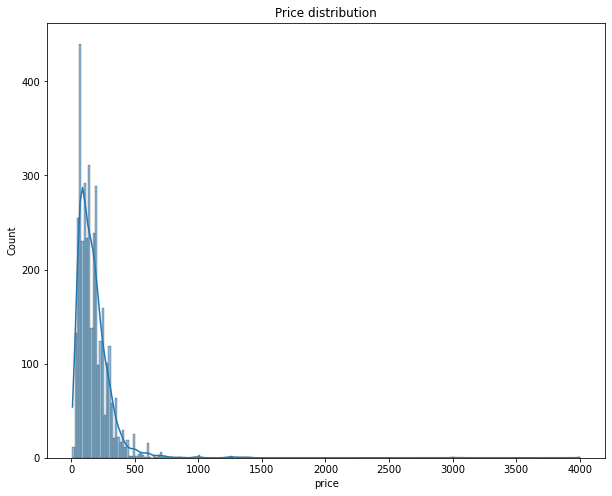

count    3557.000000
mean      174.136351
std       148.710580
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64


In [11]:
plt.figure(figsize=(10,8))
plt.title('Price distribution')
sns.histplot(_listings['price'], kde=True, fill=True)
plt.show()

print(_listings['price'].describe())

**Observations:**
1. It is seen that most of the samples from price columns are within the range of 220 USD and there are rare samples that are less than 20 USD and greater than 500. I will be removing these rows since it is rare to expect such a price from Airbnb listings.
2. I can further take the log of price to normalize the distribution while training the model.

**Removing outliers**

Let's create a new data frame containing only desired rows. Based on the above observation I am going to include rows where the price is between 20 to 500. After removing outliers we will see the improved distribution of the price.

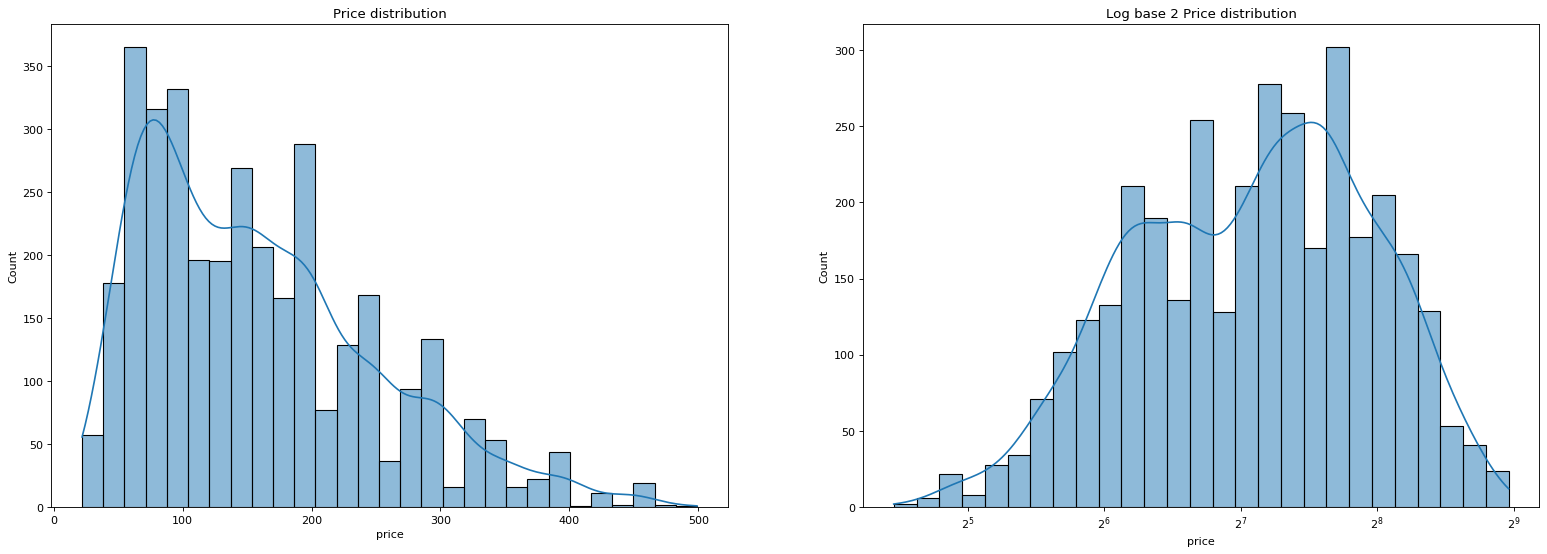

count    3557.000000
mean      174.136351
std       148.710580
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64


In [12]:
# remove outliers
_listings_new = _listings[(_listings['price'] > 20) & (_listings['price'] < 500)]

fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
axs[0].set_title('Price distribution')
axs[1].set_title('Log base 2 Price distribution')
sns.histplot(_listings_new['price'], kde=True, ax=axs[0])
sns.histplot(_listings_new['price'].astype(int), kde=True, log_scale=2, ax=axs[1])
plt.show()

print(_listings['price'].describe())

I can see now outliers are removed and the price is in good shape. The distribution of the log of the price is even better I will use this transformation later while preparing train splits.

**Correlation Matrix of all Numerical columns**

To plot a correlation matrix between numeric variables I have to select int and float type of columns from the listings dataset and then using padas corr function I can get a correlation matrix between all variables. Using the seaborn heatmap function I can plot the correlation matrix as a heatmap. Positive values show a positive or strong relationship between two given feature whereas negative values shows week relationship.

It would be interesting to see how features are related to price. Which ones are having a hot relationship with the price? This heatmap will help us further to select columns for preparing our final train and test splits.

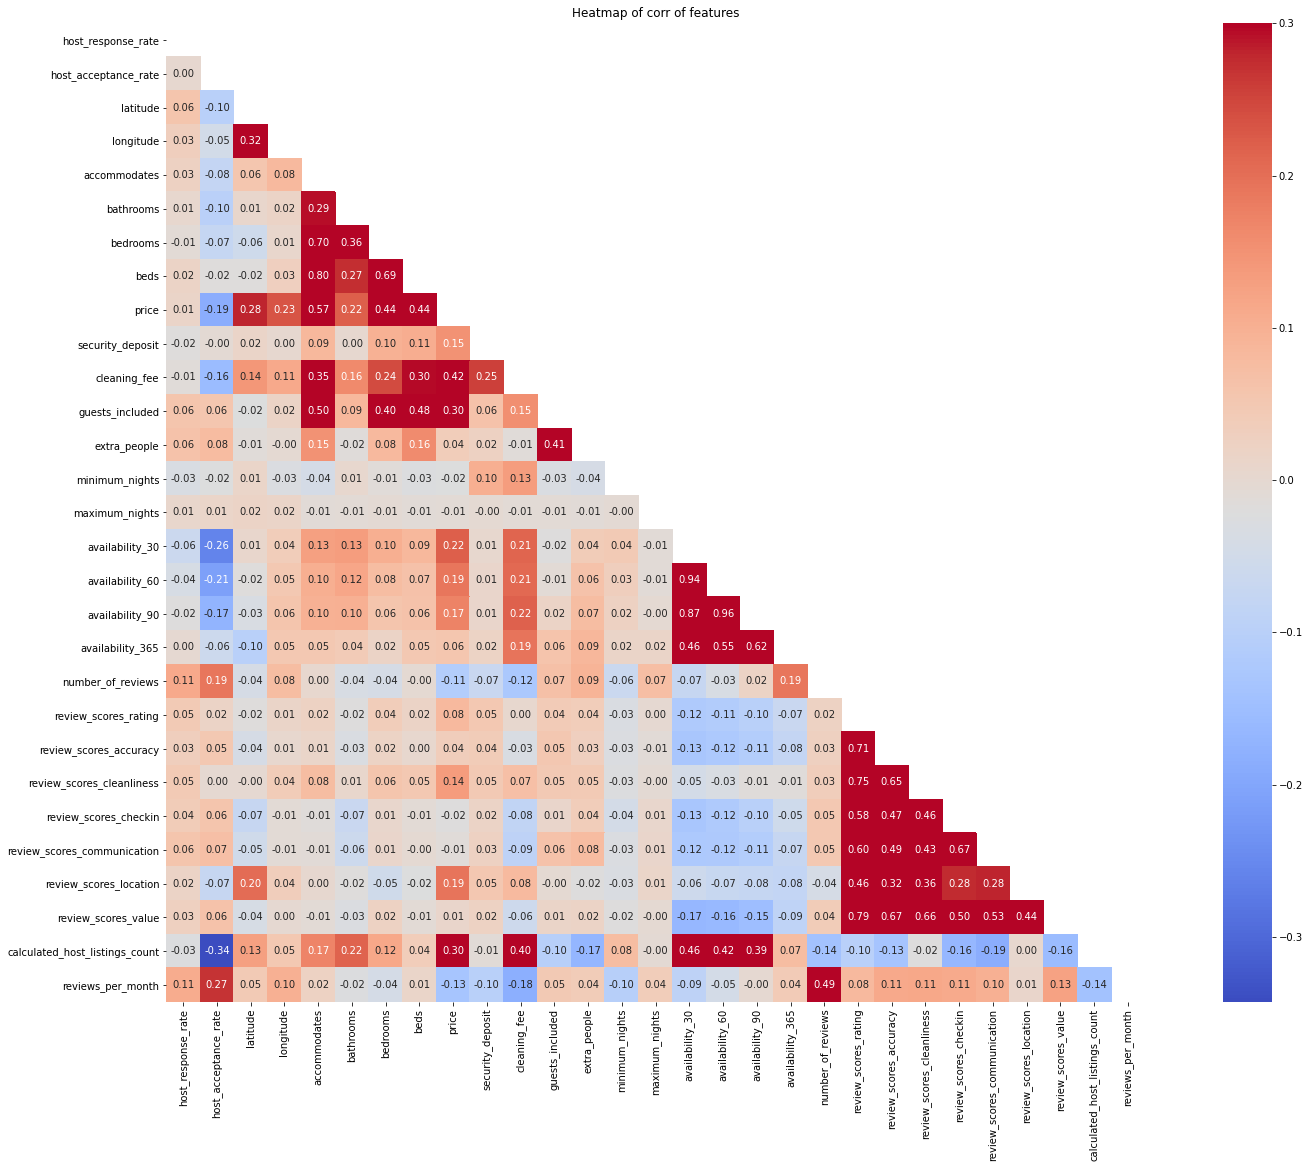

In [14]:
_corr = _listings_new.select_dtypes(include=['int64', 'float64']).corr()
_mask = np.zeros_like(_corr)
_mask[np.triu_indices_from(_mask)] = True
plt.figure(figsize=(28,18))
plt.title('Heatmap of corr of features')
sns.heatmap(_corr, mask = _mask, vmax=.3, square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

**Observations**
1.  We can see that cleaning_fee, guests_included, security_deposit, beds, bedrooms, bathrooms, accommodates, longitude, latitude, etc are having a strong relationship with price. We must select these columns for our model.
2. Surprisingly the number of reviews and reviews per month has a negative relationship with price. We can omit such features.

Let's see how bedrooms, bathrooms, and the number of beds are affecting the price. We can group by bathrooms and bedrooms followed by taking mean and then create a pivot keeping price as a response feature. We can plot the result as a heatmap using the seaborn heatmap function and see whether an extra bathroom or bed is costing more to the user or not.

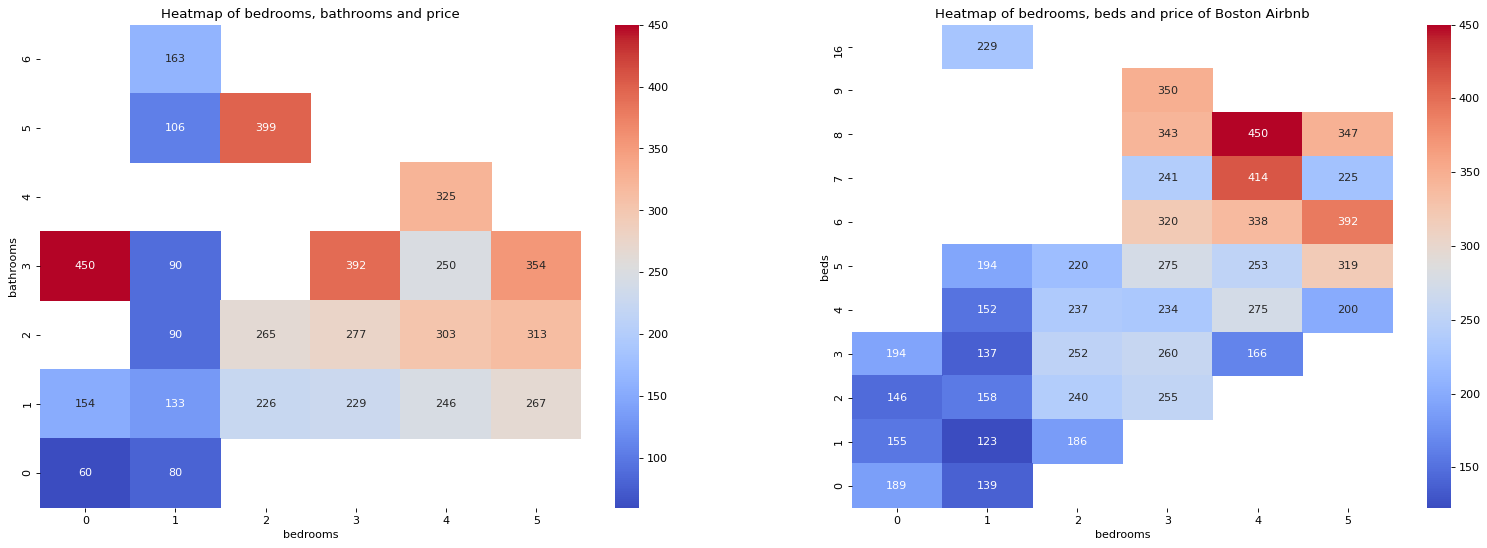

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
axs[0].set_title('Heatmap of bedrooms, bathrooms and price')
axs[1].set_title('Heatmap of bedrooms, beds and price of Boston Airbnb')

_mean_price_bbb = _listings_new.groupby(['bathrooms', 'bedrooms']).mean().price.reset_index().pivot('bathrooms','bedrooms','price').sort_index(ascending=False)
_mean_price_bbb_1 = _listings_new.groupby(['beds', 'bedrooms']).mean().price.reset_index().pivot('beds','bedrooms','price').sort_index(ascending=False)

sns.heatmap(_mean_price_bbb, cmap="coolwarm", fmt='.0f', annot=True, ax=axs[0])
sns.heatmap(_mean_price_bbb_1, cmap="coolwarm", fmt='.0f', annot=True, ax=axs[1])
plt.show()

**Observations**
1. It is seen that when the user seeks an extra bathroom it costs 40USD more on average.
2. Interestingly, beds, bedroom and price pattern is not consistent. Though it slightly indicates that if users seek an extra bed it might cost them extra.
3. Listings having zero beds or bedrooms is rare and not relevant can be dropped from the dataset.

I might be wrong here but listings with zero bedrooms don't make sense to me and it is rare as well so for sake of my model's accuracy I would like to delete these rows from the dataset.

In [17]:
_listings_new = _listings_new.drop(_listings_new[_listings_new['bedrooms']==0].index)
_listings_new.shape

(3176, 55)

I can see now I have total 3176 rows and 55 columns left which looks good to me.

# Categorical Features Analysis

Boston listings have many categorical features, It would be interesting to see which ones are affecting the price most. I'd be interested to see the pattern of price by neighborhood, property_type, room_type, bed_type, cancellation_policy, host_is_superhost, etc. It would be interesting to answer a few of the questions and draw a vibe in the neighborhood. This study will also help me to select categorical columns for the model.

I will leverage the seaborn boxplot function to visualize categorical columns concerning price.
host_is_superhost, host_identity_verified,  and instant_bookable have two types of values i.e. t (true) and f (false) which is more reasonable to say Yes and No or 1 and 0. I will transform it later. Amenities no doubt affect the pricing of a listing but transforming and analyzing it would be tricky. I'd keep my study simple and would like to have a separate notebook wherein I can explore more with textual columns. 

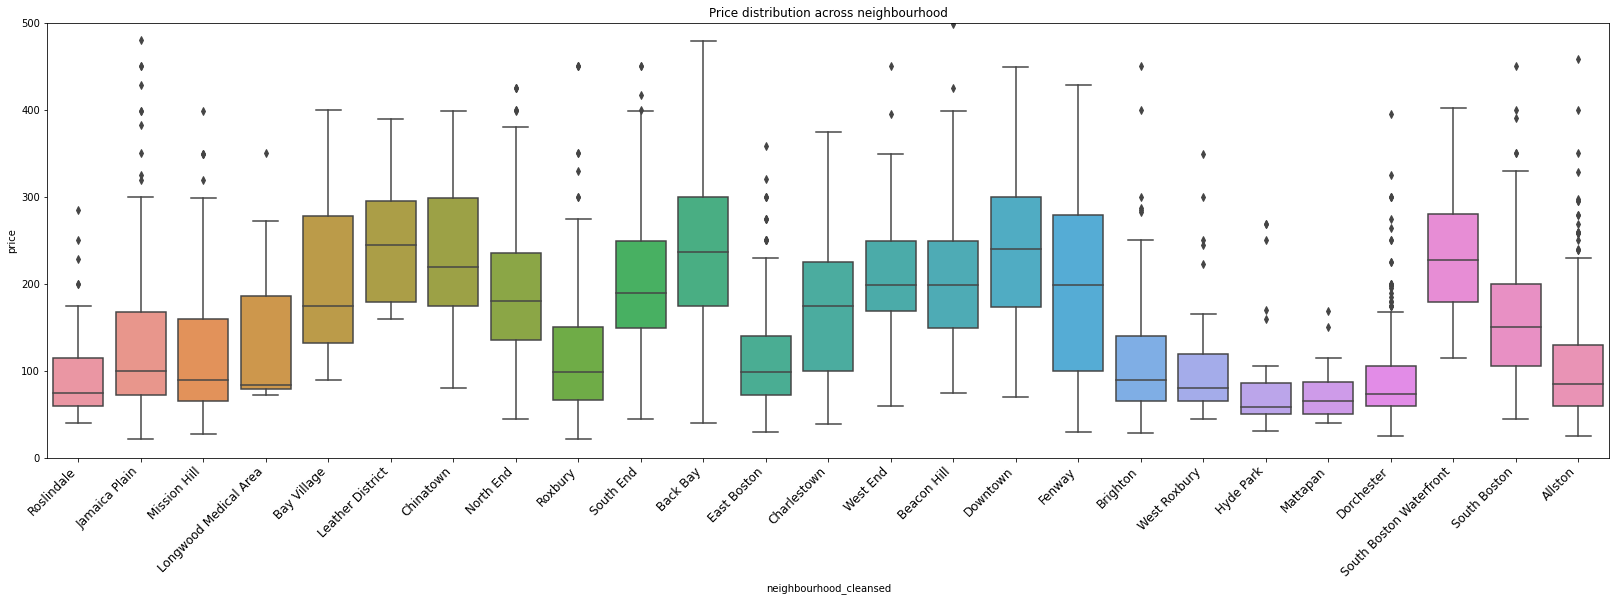

In [19]:
plt.figure(figsize=(28,8))
plt.title("Price distribution across neighbourhood")

sns.boxplot(data=_listings_new, x='neighbourhood_cleansed', y='price')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.ylim([0,500])
# plt.legend()
plt.show()

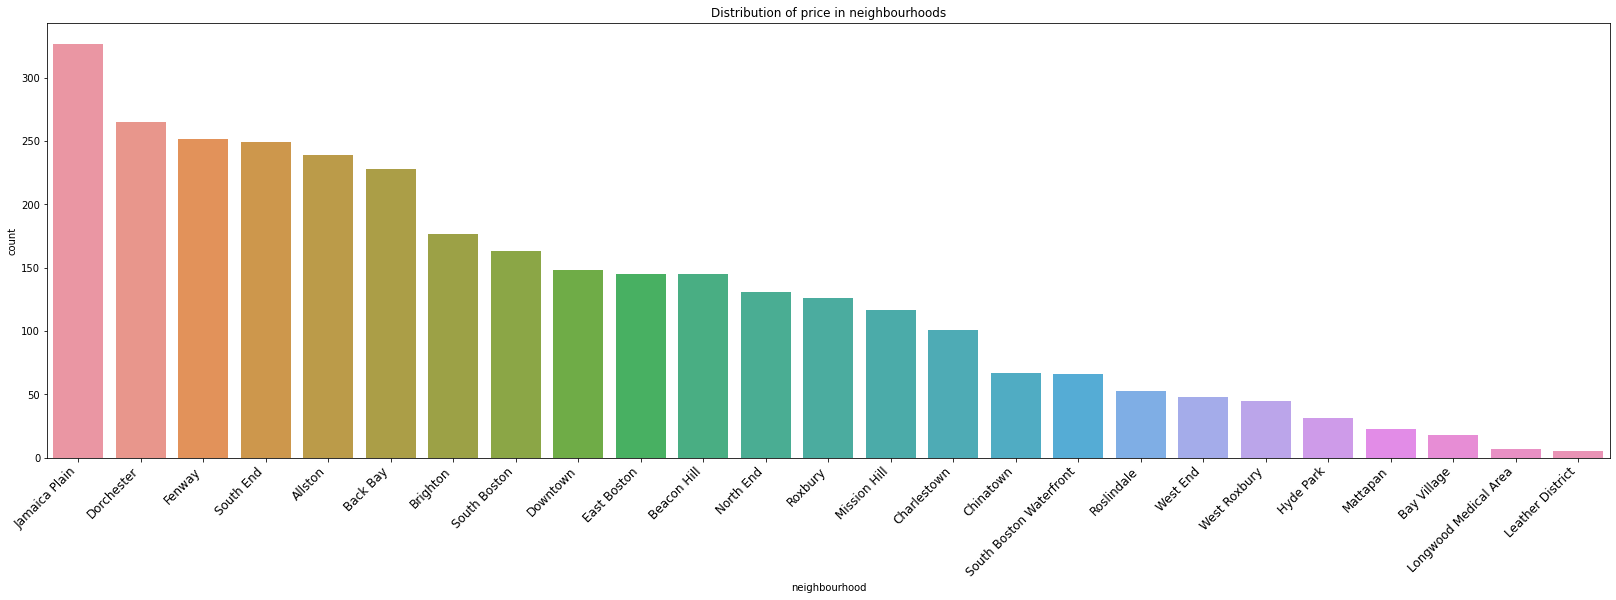

In [21]:
_neighb = _listings_new['neighbourhood_cleansed'].value_counts().sort_values(ascending=False).reset_index(name='count').rename(columns = {'index':'neighbourhood'})
plt.figure(figsize=(28,8))
plt.title("Distribution of price in neighbourhoods")
sns.barplot(data=_neighb, x='neighbourhood', y='count')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
# plt.legend()
plt.show()

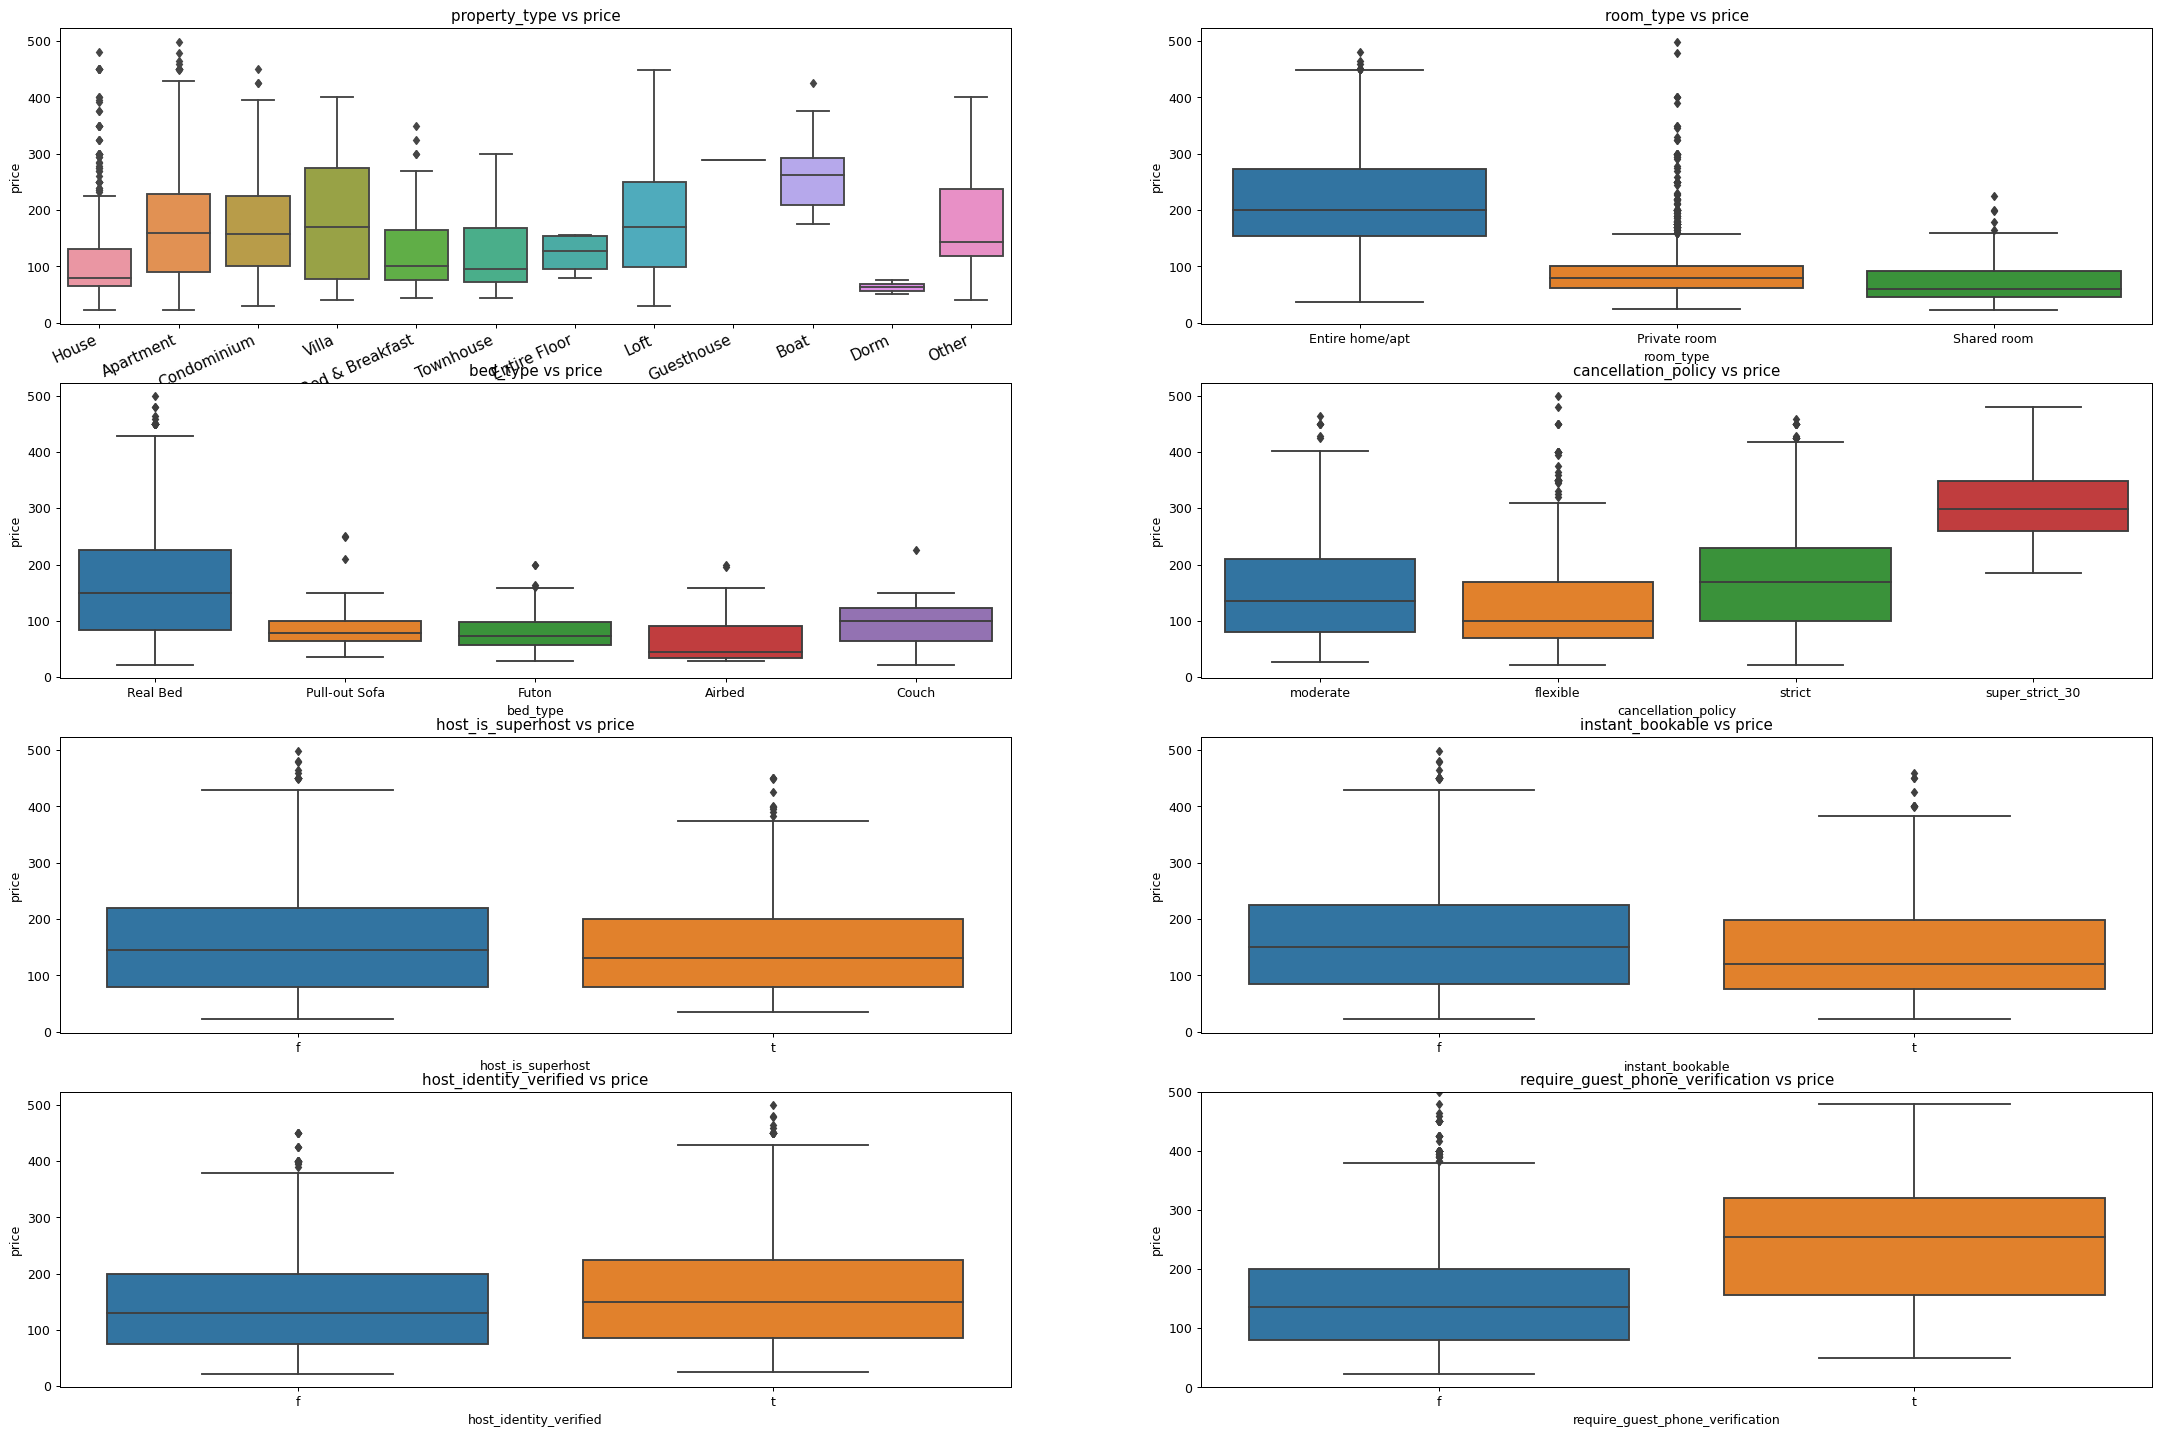

In [23]:
fig, axs = plt.subplots(4, 2, figsize=(30, 20), dpi=90)

axs[0,0].set_title('property_type vs price')
p1 = sns.boxplot(data=_listings_new, x='property_type', y='price', ax=axs[0,0])
p1.set_xticklabels(p1.get_xticklabels(), rotation=25, ha='right', fontsize=12)

axs[0,1].set_title('room_type vs price')
sns.boxplot(data=_listings_new, x='room_type', y='price', ax=axs[0,1])

axs[1,0].set_title('bed_type vs price')
sns.boxplot(data=_listings_new, x='bed_type', y='price', ax=axs[1,0])

axs[1,1].set_title('cancellation_policy vs price')
sns.boxplot(data=_listings_new, x='cancellation_policy', y='price', ax=axs[1,1])

axs[2,0].set_title('host_is_superhost vs price')
sns.boxplot(data=_listings_new, x='host_is_superhost', y='price', ax=axs[2,0])

axs[2,1].set_title('instant_bookable vs price')
sns.boxplot(data=_listings_new, x='instant_bookable', y='price', ax=axs[2,1])

axs[3,0].set_title('host_identity_verified vs price')
sns.boxplot(data=_listings_new, x='host_identity_verified', y='price', ax=axs[3,0])

axs[3,1].set_title('require_guest_phone_verification vs price')
sns.boxplot(data=_listings_new, x='require_guest_phone_verification', y='price', ax=axs[3,1])

plt.ylim([0,500])
# plt.legend()
plt.show()

**Observations:**

1. From the above charts I can see that Jamaika Plains, South End, and Back Bay have a high volume of listings. Lowest in Leather District and Longwood Medical Area.
2. It is also seen that Leather District, China Town, and Downtown are super expensive while Hyde Park, Mattapan, and Dorchester are the cheapest neighborhoods.
3. Guesthouses, boats, lofts, and villas are expensive as compare to homes and apartments.
4. As expected Entire home is expensive while private rooms and shared rooms are the cheapest for users.
5. Listings that offer Real Beds are comparatively expensive while Airbeds are cheaper. It's all about comfort. As comfort level goes up price also tends to go up.
6. Listings that have high prices tend to have a strict cancellation policy while listings of cheaper prices are super flexible.
7. Superhost lists their prices slightly higher than those who are not Superhost. Again experience matters which costs more to the user.
8. Listings that offer instant booking are slightly cheaper than listings that don't offer.
9. Listings where the host is verified are slightly higher in price than listings where the host is not verified.
10. Listings that require guest phone verification are comparatively higher in price than listings that don't require.

# Data preparation for model

To build an accurate model we should always select features that are highly correlated and influence the price most. The above data exploration explains that few numeric features are highly correlated with price, I would be keeping these features for the model. On the other hand, we have seen how categorical features are influencing price. I could have done better in terms of exploring categorical datasets, but for this study, I will stick to simplicity and will look forward to having a separate notebook wherein I would try to explore more complex features. 

Categorical features such as host_is_superhost, instant_bookable, room_type, bed_type, cancellation policy, etc can be transformed into numeric features. Replacing values for each key with a unique number will make more sense and help our model understand it better. Pandas get_dummies function comes very handily to transform such categorical features into binary vectors.

Finally, we have to prepare a data frame containing selected numeric and categorical features. I am selecting the following features for the model based on the study above.

**Selected Numerical Features:**

price, latitude,longitude, accomodates, bedrooms, bathrooms, beds, security_deposit, cleaning_fee, guests_included, availability_30, availability_60, availability_90, availability_365, review_score_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_location, review-scores_value, calculated_host_listings_count.

**Selected Categorical Features:**

host_response_time, host_is_superhost, room_type, bed_type, neighbourhood_cleansed, cancellation_policy, property_type, host_identity_verified, instant_bookable, host_has_profile_pic, require_guest_profile_picture, require_guest_phone_verification.

# Prepare final dataset

Its time to prepare the final dataset containing selected numerical and categorical features. I will first select numerical columns using the pandas select_dtypes function and then assigning it to a new data frame. Next, I will transform the categorical columns into numerical/binary vectors. Pandas get_dummies function takes the pain here. It takes the data frame and converts categorical columns into binary vector representations which are cool.

Finally, my new data frame will be used to extract input (X) and output (y) features to train and evaluate a model.

In [25]:
# select numeric cols based on above anlysis
_num_cols = ['price', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 'security_deposit',
             'cleaning_fee', 'guests_included', 'availability_30', 'availability_60', 'availability_90',
             'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
             'review_scores_location', 'review_scores_value', 'calculated_host_listings_count']

# fetch selected columns and assign it to new dataframe
_numeric = _listings_new.select_dtypes(include=['int64', 'float64'])[_num_cols]
print(_numeric.info())

# select categorical columns based on the analysis
_cat_cols = ['host_response_time', 'host_is_superhost', 'room_type', 'bed_type', 'neighbourhood_cleansed',
             'cancellation_policy', 'property_type', 'host_identity_verified', 'instant_bookable',
             'host_has_profile_pic', 'require_guest_profile_picture', 'require_guest_phone_verification']

# assign categorical columns to numeric dataframe
_numeric[_cat_cols] = _listings_new[_cat_cols]

# get a copy of the resultant dataframe
_num_copy = _numeric.copy()

# perform replace operation on categorical columns to represent it in better way
_num_copy = _num_copy.replace({"host_is_superhost": {"t": 1, "f": 2}, "instant_bookable": {"t": 1, "f": 2},
                               "host_identity_verified": {"t": 1, "f": 2}, "require_guest_profile_picture": {"t": 1, "f": 2},
                               "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3}, "host_has_profile_pic": {"t": 1, "f": 2},
                               "bed_type": {"Real Bed": 1, "Futon": 2, "Airbed": 3, "Pull-out Sofa": 4, "Couch": 5},
                               "require_guest_phone_verification": {"t": 1, "f": 2},
                               "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}})

# transform categorical columns into numeric and prepare new data frame
_dummies = pd.get_dummies(_num_copy)
print(_dummies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3176 entries, 12147973 to 14504422
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           3176 non-null   float64
 1   latitude                        3176 non-null   float64
 2   longitude                       3176 non-null   float64
 3   accommodates                    3176 non-null   int64  
 4   bedrooms                        3176 non-null   int64  
 5   bathrooms                       3176 non-null   int64  
 6   beds                            3176 non-null   int64  
 7   security_deposit                3176 non-null   float64
 8   cleaning_fee                    3176 non-null   float64
 9   guests_included                 3176 non-null   int64  
 10  availability_30                 3176 non-null   int64  
 11  availability_60                 3176 non-null   int64  
 12  availability_90        

# Train and Evaluate model

Here comes the most exciting part of my study. The training and Evaluating model is been always interesting to me. Training and Evaluation of the model are divided into the following steps:
1. Extracting input (X) and output (y) features from the dataset.
2. Split the X and y samples into training and testing samples. train_test_split function of sklearn does the job for us. It takes X and y and splits it into train and test datasets respectively.
3. Instantiate and Fit the model using x_train and y_train samples. sklearn's model.fit function does the magic here by taking x_train and y_train as        input.
4. Predict price using the given model by providing x_test samples. sklearn's model.predict method takes x_test samples and returns prediction.
5. Calculate mean absolute error by providing y_test (actual output) and prediction samples. mean_absolute_error of sklearn helps to calculate the same.
6. Plot actual values vs predicted values and see how our model performed throughout its journey of learning.

I am going to use LinearRegressor and RandomForestRegressor as my model. It would be interesting to see which one is performing better.

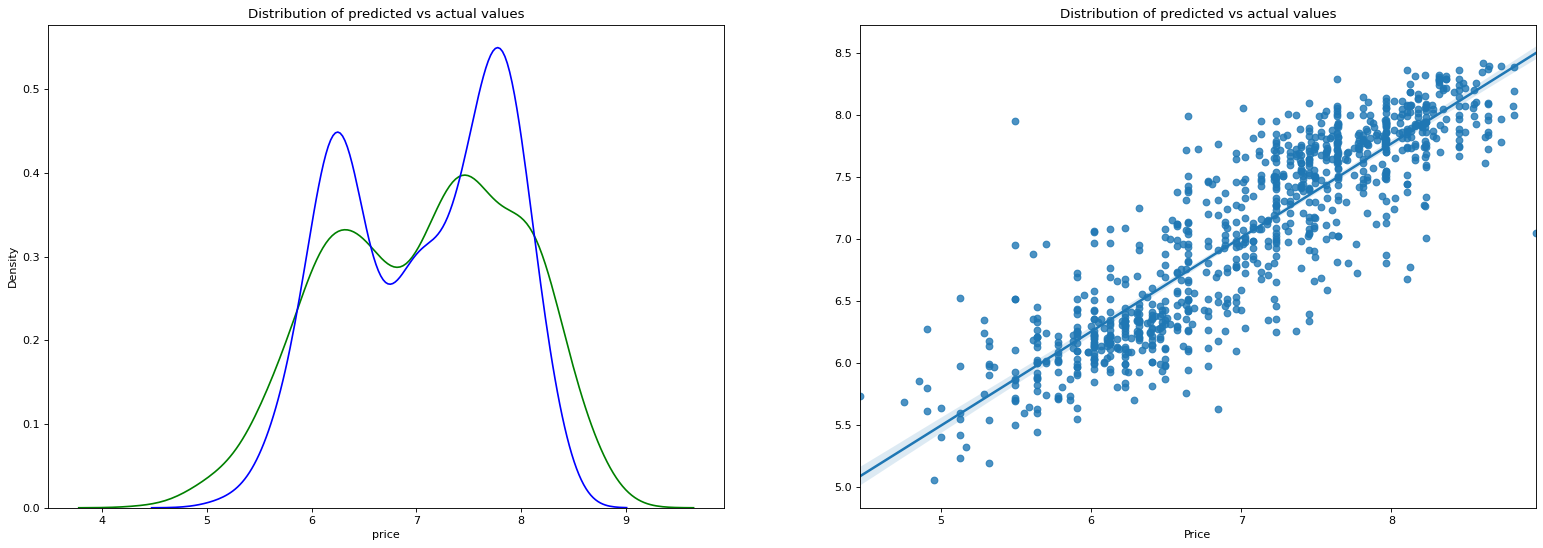

Mean absolute error of RandomForestRegressor(n_estimators=76, random_state=47): 0.3151169663770573


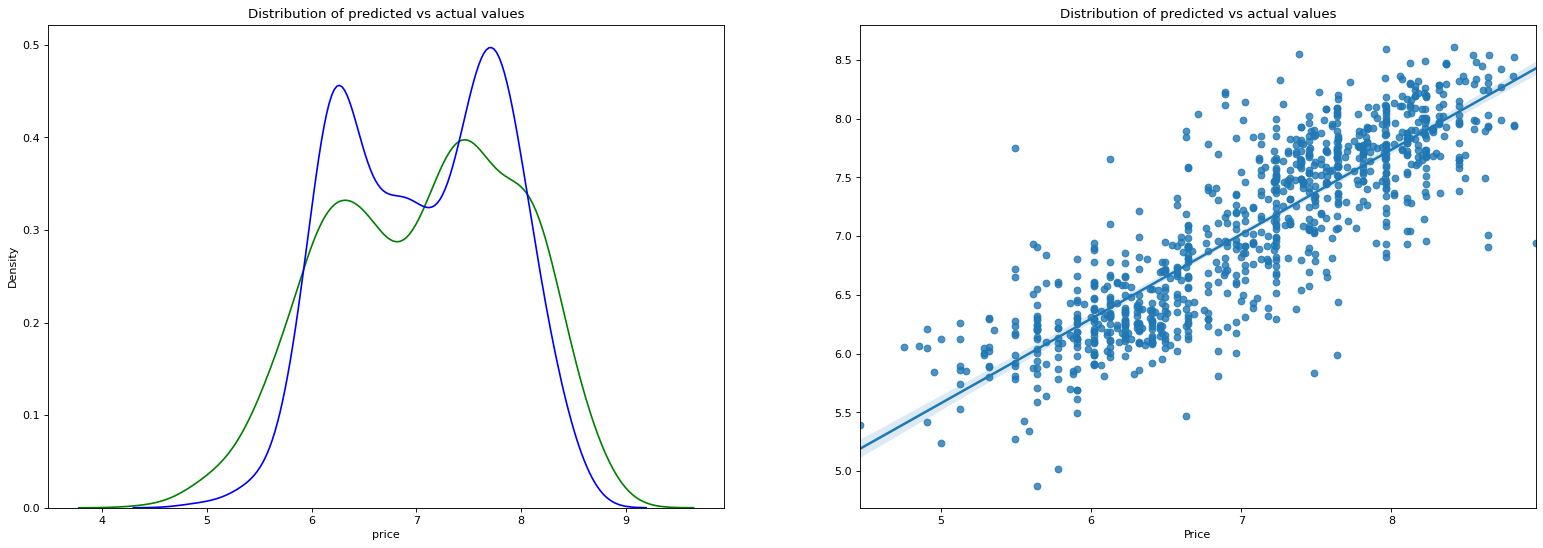

Mean absolute error of LinearRegression(): 0.3574351314159514


In [27]:
# model to predict pricing

# fetch output vector/feature y from dummies dataframe.
# take log of price, convert it to int and then assign it to y
y = np.log2(_dummies['price'].astype(int))

# fetch and assign all columns except price from dummies dataframe
X = _dummies.drop('price',  axis =1 )

# split the samples into train and test from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

# function to train and evaluate given model
def evaluate_model(_model, x_train, y_train, x_test, y_test):
    # fit the model by providing x_train and y_train
    _model.fit(x_train, y_train)
    # predict model by providing x_test
    _prediction = _model.predict(x_test)
    # calculate mean abs error by passing y_test and _predictions
    _mean_abs_err = mean_absolute_error(y_test, _prediction)
    
    # kde plot actual values vs predicted values
    fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
    axs[0].set_title('Distribution of predicted vs actual values')
    ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values', ax=axs[0])
    ax2 = sns.kdeplot(data=_prediction, color="b", label='Predicted values', ax=ax1)
    
    # reg plot actual values vs predicted values
    sns.regplot(x=y_test, y=_prediction)
    plt.title('Distribution of predicted vs actual values')
    plt.xlabel('Price')
    # plt.legend()
    plt.show()
    plt.close()
    
    print("Mean absolute error of {0}: {1}".format(_model, _mean_abs_err))

# Create instance of Random Forest Regressor and evaluate model
_model_rf = RandomForestRegressor(n_estimators=76, random_state=47)
# evaluate randor forest regressor model
evaluate_model(_model_rf, X_train, y_train, X_test, y_test)

# Create instance of Linear Regressor and evaluate the same
_model_lr = LinearRegression()
# evaluate linear regressor model
evaluate_model(_model_lr, X_train, y_train, X_test, y_test)

# Conclusions

Finally, I have trained and evaluated two models and I can see RandomForestRegressor did a better job as compare to LinearRegressor. I can see the absolute mean error for RFR is 0.31 whereas 0.35 for LR. I can see the scope of doing better here, nevertheless, Kaggle and Udacity will give me many more opportunities to perform better.

Lets try to answer following questions based on the study we did.

**1. What Features are affecting the price most ? name the features that affects the price most.**

Answer: Based on study we can see that following features are affecting the price:

Selected Numerical Features:

price, latitude,longitude, accomodates, bedrooms, bathrooms, beds, security_deposit, cleaning_fee, guests_included, availability_30, availability_60, availability_90, availability_365, review_score_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_location, review-scores_value, calculated_host_listings_count.

Selected Categorical Features:

host_response_time, host_is_superhost, room_type, bed_type, neighbourhood_cleansed, cancellation_policy, property_type, host_identity_verified, instant_bookable, host_has_profile_pic, require_guest_profile_picture, require_guest_phone_verification.


**2. How do features affect the price of listings ? Does experience and comfort cost more to the user ?**

Answer: Based on study above it is proven that experience and comfort cost more to the user!

1. It is seen that when the user seeks an extra bathroom it costs 40USD more on average.
2. Interestingly, beds, bedroom and price pattern is not consistent. Though it slightly indicates that if users seek an extra bed it might cost them extra.
3. From the above charts I can see that Jamaika Plains, South End, and Back Bay have a high volume of listings. Lowest in Leather District and Longwood Medical Area.
4. It is also seen that Leather District, China Town, and Downtown are super expensive while Hyde Park, Mattapan, and Dorchester are the cheapest neighborhoods.
5. Guesthouses, boats, lofts, and villas are expensive as compare to homes and apartments.
6. As expected Entire home is expensive while private rooms and shared rooms are the cheapest for users.
7. Listings that offer Real Beds are comparatively expensive while Airbeds are cheaper. It's all about comfort. As comfort level goes up price also tends to go up.
8. Listings that have high prices tend to have a strict cancellation policy while listings of cheaper prices are super flexible.
9. Superhost lists their prices slightly higher than those who are not Superhost. Again experience matters which costs more to the user.
10. Listings that offer instant booking are slightly cheaper than listings that don't offer.
11. Listings where the host is verified are slightly higher in price than listings where the host is not verified.
12. Listings that require guest phone verification are comparatively higher in price than listings that don't require.

**3. Can we predict the price of a listing in Boston AirBnB ?**

Answer: RandomForestRegressor did a better job as compare to LinearRegressor. The absolute mean error for RFR is 0.31 whereas 0.35 for LR.